In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
sns.set(style='darkgrid')

In [423]:
traindf=pd.read_csv("./Train.csv")
testdf=pd.read_csv("./Test.csv")
#submissiondf=pd.read_csv("./sample_submission.csv")
print(traindf.shape)
traindf.head()

(23856, 18)


,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [424]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

Date and Incident ID belongs to Object type, they may have to be handled differntly

In [425]:
print(testdf.shape)
testdf.head()

(15903, 17)


,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


## 1. Data Analysis

### 1.1 Target Variable

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64


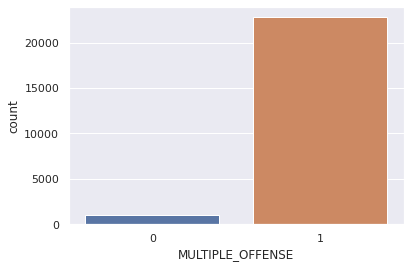

In [426]:
# Multiple_offense is the target varaible, lets see how it is populated
## Plotting the bar char to identify the frequnecy of values
sns.countplot(traindf["MULTIPLE_OFFENSE"])
##prinitng number of values for each type
print(traindf["MULTIPLE_OFFENSE"].value_counts())


**Clearly Dataset is Imbalanced**

### 1.2 Handling Null Values

In [427]:
# Analysing NULL values in the features
for col in traindf.columns:
    if traindf[col].isnull().values.any():
        print(f"Train Dataset Feature - {col} contains {traindf[col].isna().sum()*100/traindf[col].sum()}% of Null Values")
    
for col in testdf.columns:
    if testdf[col].isnull().values.any():
        print(f"Test Dataset Feature - {col} contains {testdf[col].isna().sum()*100/testdf[col].sum()}% of Null Values")

Train Dataset Feature - X_12 contains 0.7892454466608847% of Null Values
Test Dataset Feature - X_12 contains 0.8280088668666058% of Null Values


Very less percentage  of values are null, Lets see how it impacts the target variable

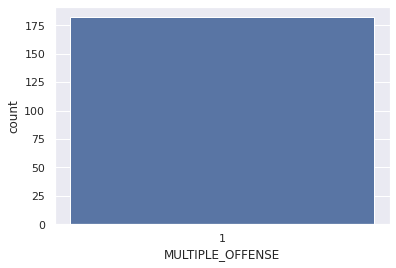

In [428]:
tempdf=traindf.loc[traindf["X_12"].isnull()==True]["MULTIPLE_OFFENSE"]
sns.countplot(tempdf)

All the Null values belong to Multiple_offense category "1" which is the highest frequent class, so we can remove the records with null entires

In [429]:
print(traindf.shape)
traindf=traindf.dropna(axis=0, subset=['X_12'])
print(traindf.shape)

(23856, 18)
(23674, 18)


### 1.3 Handling Date Object

In [430]:
traindf["DATE"].loc[0:5]

0    04-JUL-04
1    18-JUL-17
2    15-MAR-17
3    13-FEB-09
4    13-APR-05
5    07-APR-03
Name: DATE, dtype: object

In [431]:
traindf['DATE'] = pd.to_datetime(traindf.DATE)
testdf['DATE'] = pd.to_datetime(testdf.DATE)
traindf['DATE'].head()

0   2004-07-04
1   2017-07-18
2   2017-03-15
3   2009-02-13
4   2005-04-13
Name: DATE, dtype: datetime64[ns]

In [0]:
def Get_feature_from_DATE(df):
    df['MONTH'] = df['DATE'].dt.month
    df['DAY'] = df['DATE'].dt.day
    df['YEAR'] = df['DATE'].dt.year
    df['DAYOFWEEK'] = df['DATE'].dt.dayofweek
    df['WEEKEND'] = np.where(df['DATE'].dt.day_name().isin(['Sunday','Saturday']),1,0)
    df=df.drop(['DATE'],axis=1)
    return df

In [433]:
traindf=Get_feature_from_DATE(traindf)
testdf=Get_feature_from_DATE(testdf)
traindf.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,MONTH,DAY,YEAR,DAYOFWEEK,WEEKEND
0,CR_102659,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,7,4,2004,6,1
1,CR_189752,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,7,18,2017,1,0
2,CR_184637,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,3,15,2017,2,0
3,CR_139071,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,2,13,2009,4,0
4,CR_109335,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,4,13,2005,2,0


### 1.4 Outlier Handling

In [434]:
traindf.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,MONTH,DAY,YEAR,DAYOFWEEK,WEEKEND
count,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000,23674.000000
mean,0.481287,24.792895,24.644547,4.279463,2.457886,6.159965,4.881304,0.974867,4.924263,1.246557,207.190293,0.974064,85.260412,72.628326,33.463293,0.954887,6.507561,15.560995,2004.147757,2.982301,0.277393
std,1.435650,15.249384,15.148753,2.947699,1.964675,4.470403,3.881914,1.457230,1.366316,1.123247,93.325984,1.167725,27.558044,43.348684,8.289967,0.207556,3.292017,8.776705,7.738435,1.995195,0.447722
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1991.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000,4.000000,8.000000,1998.000000,1.000000,0.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000,7.000000,15.000000,2004.000000,3.000000,0.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000,9.000000,23.000000,2011.000000,5.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000,12.000000,31.000000,2018.000000,6.000000,1.000000


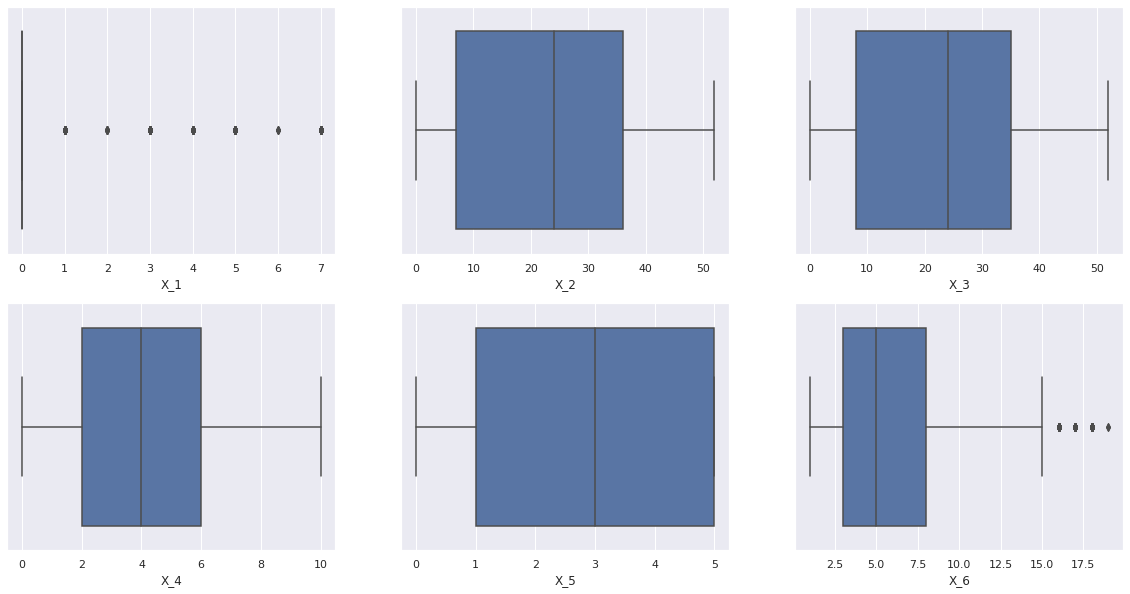

In [435]:
Numerical_features=['X_1','X_2','X_3','X_4','X_5','X_6']
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(Numerical_features, ax.flatten()):
    sns.boxplot(traindf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

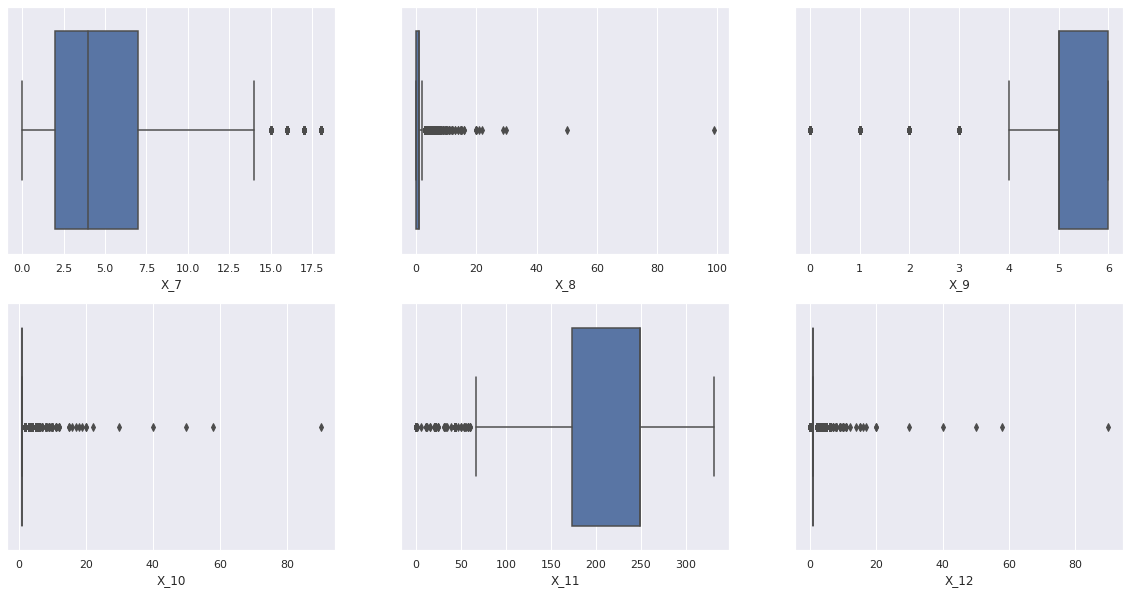

In [436]:
Numerical_features=['X_7','X_8','X_9','X_10','X_11','X_12']
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(Numerical_features, ax.flatten()):
    sns.boxplot(traindf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

X_1,X_10,X_12 are categorical data 
X_2, X_3, X_4, X_5  are nominal data and looks good in terms of outliers, remanining have to be analysed more

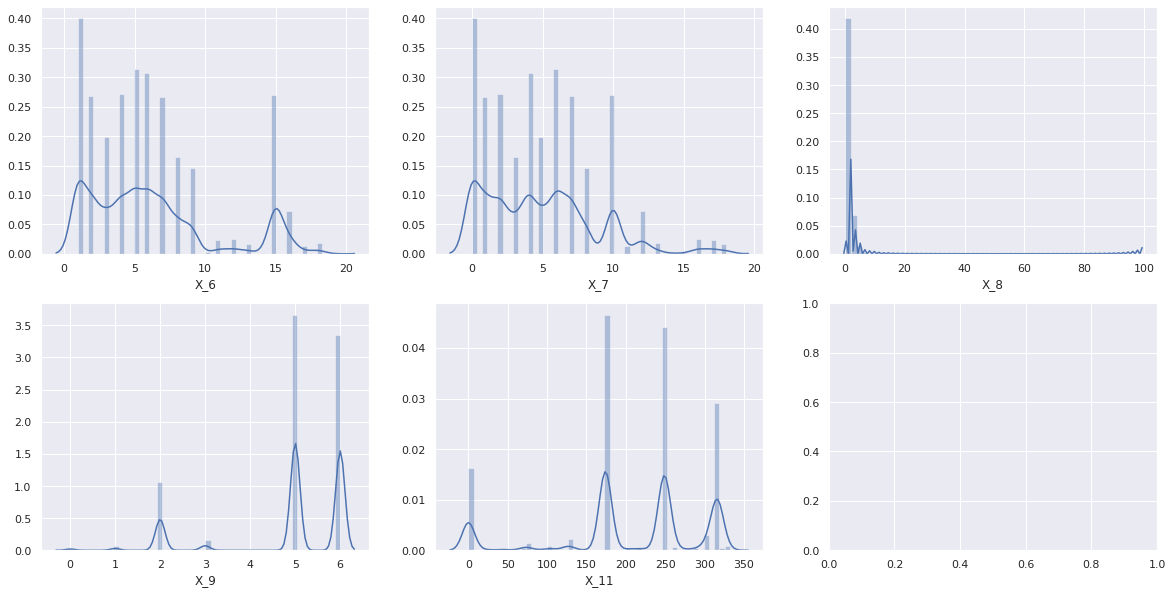

In [437]:
Numerical_features=['X_6','X_7','X_8','X_9','X_11']
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(Numerical_features, ax.flatten()):
    sns.distplot(traindf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

In [438]:
#removing outliers from X_8 variable
print(traindf.shape)
traindf = traindf[~((traindf['X_8']>6))]
print(traindf.shape)

(23674, 22)
(23527, 22)


In [439]:
#removing outliers from X_10 variable
print(traindf.shape)
traindf = traindf[~((traindf['X_10']>10))]
print(traindf.shape)

(23527, 22)
(23509, 22)


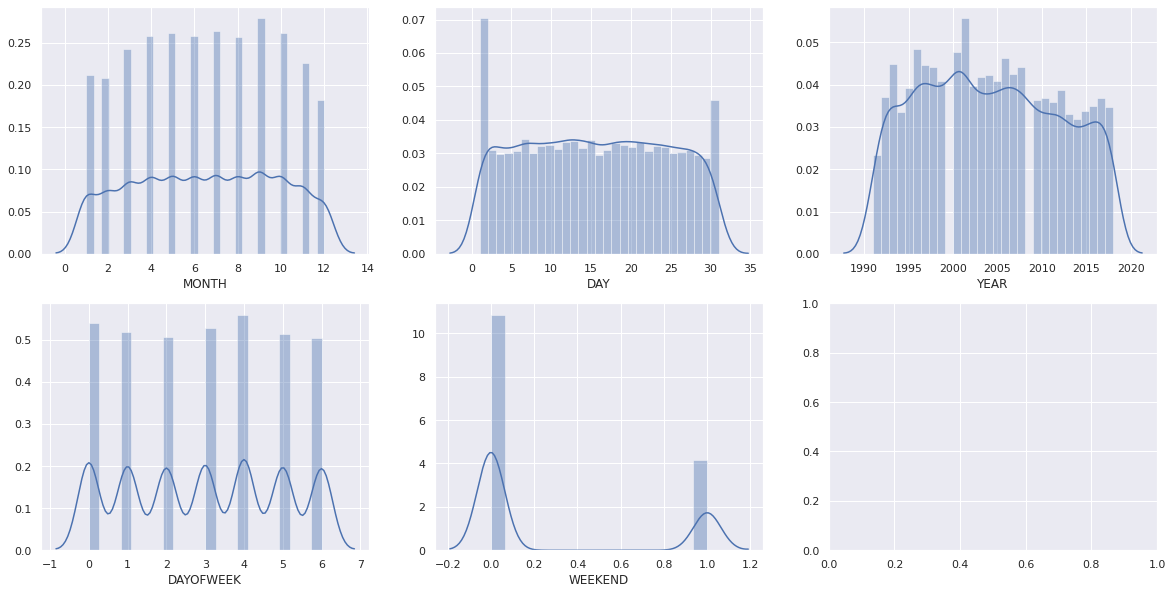

In [440]:
Numerical_features=['MONTH','DAY','YEAR','DAYOFWEEK','WEEKEND']
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(Numerical_features, ax.flatten()):
    sns.distplot(traindf[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

### 1.5 Handling Categorical data

0    18764
1     3459
7      858
5      263
3      124
4       26
2       10
6        5
Name: X_1, dtype: int64


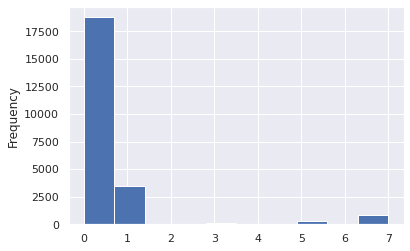

In [441]:
traindf['X_1'].plot.hist()
print(traindf['X_1'].value_counts())

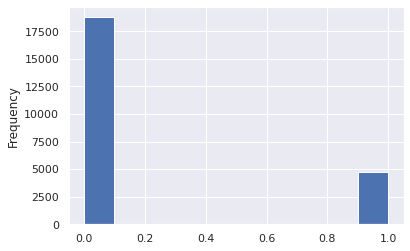

In [442]:
traindf["X_1_new"]=traindf["X_1"].apply(lambda x : x if x ==0  else 1)
testdf["X_1_new"]=testdf["X_1"].apply(lambda x : x if x ==0  else 1)
traindf["X_1_new"].plot.hist()

1     19924
2      2663
3       540
4       216
5        70
6        54
8        15
10       14
9         7
7         6
Name: X_10, dtype: int64


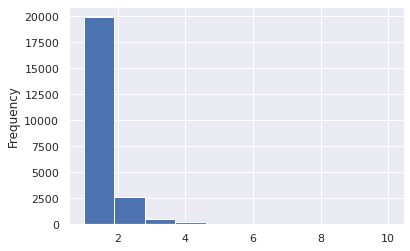

In [443]:
traindf['X_10'].plot.hist()
print(traindf['X_10'].value_counts())

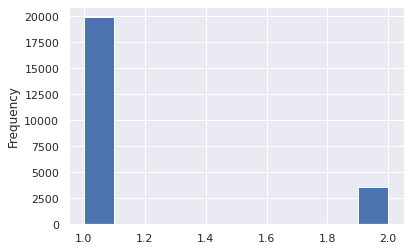

In [444]:
traindf["X_10_new"]=traindf["X_10"].apply(lambda x : x if x ==1  else 2)
testdf["X_10_new"]=testdf["X_10"].apply(lambda x : x if x ==1  else 2)
traindf["X_10_new"].plot.hist()

1.0     15584
0.0      5160
2.0      2006
3.0       471
4.0       170
5.0        59
6.0        36
8.0         9
10.0        6
9.0         5
7.0         3
Name: X_12, dtype: int64


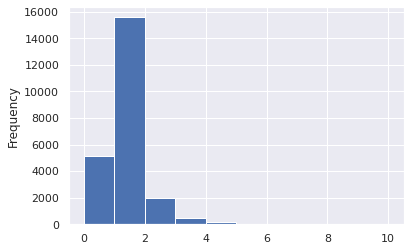

In [445]:
traindf['X_12'].plot.hist()
print(traindf['X_12'].value_counts())

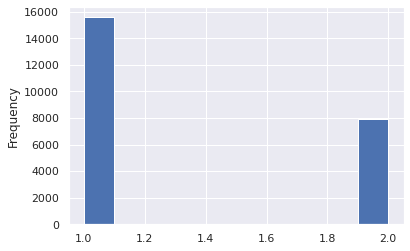

In [446]:
traindf["X_12_new"]=traindf["X_12"].apply(lambda x : x if x ==1  else 2)
testdf["X_12_new"]=testdf["X_12"].apply(lambda x : x if x ==1  else 2)
traindf["X_12_new"].plot.hist()

In [447]:
# X_2 and X_3 are highly corelated
traindf.drop(['X_1','X_10','X_12','INCIDENT_ID'], axis=1, inplace=True)
testdf.drop(['X_1','X_10','X_12'], axis=1, inplace=True)
traindf.head()

,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_11,X_13,X_14,X_15,MULTIPLE_OFFENSE,MONTH,DAY,YEAR,DAYOFWEEK,WEEKEND,X_1_new,X_10_new,X_12_new
0,36,34,2,1,5,6,1,6,174,92,29,36,0,7,4,2004,6,1,0,1,1.0
1,37,37,0,0,11,17,1,6,236,103,142,34,1,7,18,2017,1,0,1,1,1.0
2,3,2,3,5,1,0,2,3,174,110,93,34,1,3,15,2017,2,0,0,1,1.0
3,33,32,2,1,7,1,1,6,249,72,29,34,1,2,13,2009,4,0,0,1,1.0
4,33,32,2,1,8,3,0,5,174,112,29,43,1,4,13,2005,2,0,0,1,2.0


### 1.6 Corelation between Features

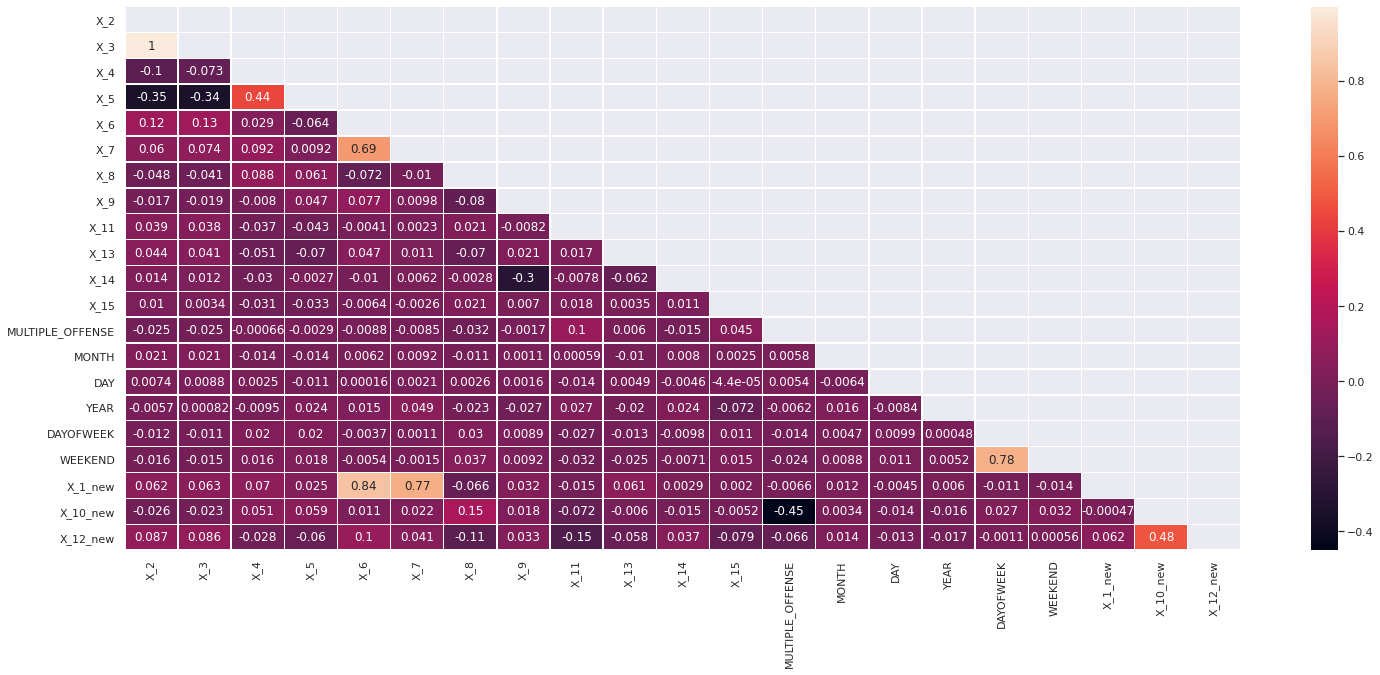

In [448]:
fig, ax = plt.subplots(figsize=(25,10))         # Sample figsize in inches
matrix = np.triu(traindf.corr())
sns.heatmap(traindf.corr(), annot=True, mask=matrix,linewidths=.5, ax=ax)

* X_2 and X_3 are highly corelated
* X_1_new and X_6,X-7 are highly correlated
* X_6 and X_7 are highly correlated
* DayOfWeek and Weekend are highly correlated

In [449]:
#Dropping those columns
traindf.drop(['X_3','X_1_new','DAYOFWEEK','X_7'], axis=1, inplace=True)
testdf.drop(['X_3','X_1_new','DAYOFWEEK','X_7'], axis=1, inplace=True)
traindf.head()

,X_2,X_4,X_5,X_6,X_8,X_9,X_11,X_13,X_14,X_15,MULTIPLE_OFFENSE,MONTH,DAY,YEAR,WEEKEND,X_10_new,X_12_new
0,36,2,1,5,1,6,174,92,29,36,0,7,4,2004,1,1,1.0
1,37,0,0,11,1,6,236,103,142,34,1,7,18,2017,0,1,1.0
2,3,3,5,1,2,3,174,110,93,34,1,3,15,2017,0,1,1.0
3,33,2,1,7,1,6,249,72,29,34,1,2,13,2009,0,1,1.0
4,33,2,1,8,0,5,174,112,29,43,1,4,13,2005,0,1,2.0


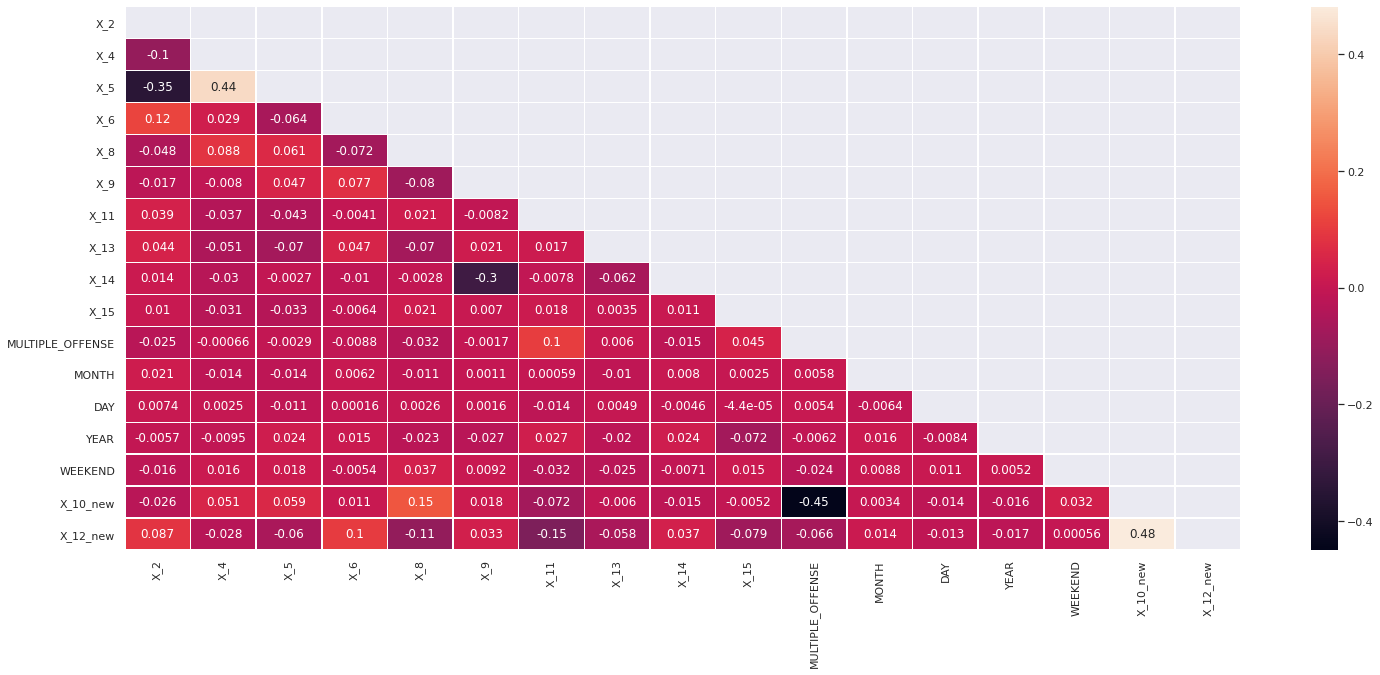

In [450]:
fig, ax = plt.subplots(figsize=(25,10))         # Sample figsize in inches
matrix = np.triu(traindf.corr())
sns.heatmap(traindf.corr(), annot=True, mask=matrix,linewidths=.5, ax=ax)

## 2.Model Selection

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

x = traindf.drop(["MULTIPLE_OFFENSE"], axis=1)
y = traindf["MULTIPLE_OFFENSE"]

Using Recursive feature elimination (RFE) to eliminate multiple features and selecting desired number of features

In [452]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(x,y)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[5 1 1 1 1 1 3 7 4 1 1 2 6 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


considering columsn for modelling - X_2, X_4, X_8, X_11, X_15, Year, Weekend, X_10_new, X_12_New

In [0]:
x = traindf.drop(["X_5","X_6","X_9","X_13","MONTH","DAY","MULTIPLE_OFFENSE"], axis=1)
#x = traindf.drop(["X_2","X_11","X_13","X_14","YEAR","DAY","MULTIPLE_OFFENSE"], axis=1)
y = traindf["MULTIPLE_OFFENSE"]

In [454]:
x.head()

,X_2,X_4,X_8,X_11,X_14,X_15,YEAR,WEEKEND,X_10_new,X_12_new
0,36,2,1,174,29,36,2004,1,1,1.0
1,37,0,1,236,142,34,2017,0,1,1.0
2,3,3,2,174,93,34,2017,0,1,1.0
3,33,2,1,249,29,34,2009,0,1,1.0
4,33,2,0,174,29,43,2005,0,1,2.0


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

Using SMOTE for making imbalanced dataset to Balanced dataset. 
SMOTE is an oversampling technique that generates synthetic samples from the minority class

In [456]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before OverSampling, counts of label '1': 15714
Before OverSampling, counts of label '0': 742 

After OverSampling, the shape of train_X: (31428, 10)
After OverSampling, the shape of train_y: (31428,) 

After OverSampling, counts of label '1': 15714
After OverSampling, counts of label '0': 15714


In [0]:
X_train_df=pd.DataFrame(X_train_res,columns=x_train.columns)

Text(0, 0.5, 'Frequency')

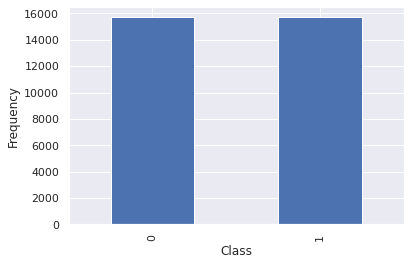

In [458]:
count_classes = pd.value_counts(y_train_res, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.xlabel("Class")
plt.ylabel("Frequency")

In [459]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
LR= LogisticRegression(penalty='l2')
LR= LR.fit(X_train_df,y_train_res)
Y_pred = LR.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [460]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, Y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, Y_pred))
print("precision", metrics.precision_score(y_test,Y_pred))
print("recall", metrics.recall_score(y_test,Y_pred,average='binary'))
confusion=confusion_matrix(y_test,Y_pred)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate",FP/ float(TN+FP))

[[ 268   41]
 [ 966 5778]] 

accuracy 0.8572238763646676
precision 0.9929541158274617
recall 0.8567615658362989
Sensitivity 0.8567615658362989
Positive Predection Rate 0.9929541158274617
Negative Predection rate 0.2171799027552674
False positive Predection Rate 0.13268608414239483


In [461]:
testdf.head()

,INCIDENT_ID,X_2,X_4,X_5,X_6,X_8,X_9,X_11,X_13,X_14,X_15,MONTH,DAY,YEAR,WEEKEND,X_10_new,X_12_new
0,CR_195453,30,7,3,6,0,5,174,72,119,23,2,1,2018,0,1,2.0
1,CR_103520,44,1,3,7,4,6,316,12,29,34,3,5,2004,0,1,2.0
2,CR_196089,34,3,5,2,3,0,316,72,0,34,1,27,2018,1,1,1.0
3,CR_112195,3,3,5,9,0,5,174,112,87,34,8,18,2006,0,1,1.0
4,CR_149832,7,7,3,2,1,5,174,112,93,43,10,31,2011,0,1,2.0


In [0]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

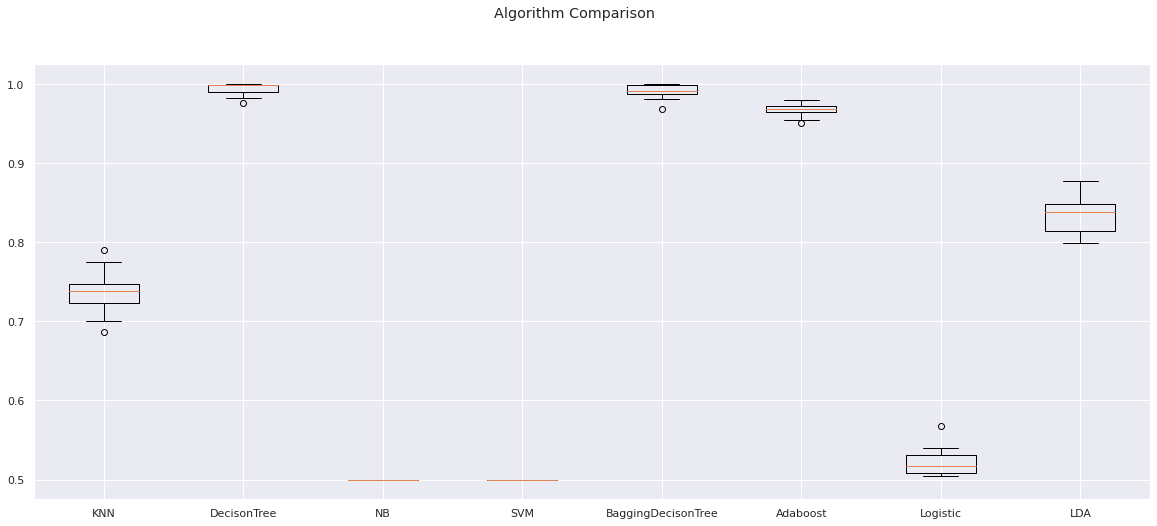

KNN: 0.735579 (0.026123)
DecisonTree: 0.993714 (0.007175)
NB: 0.500000 (0.000000)
SVM: 0.500000 (0.000000)
BaggingDecisonTree: 0.991134 (0.008750)
Adaboost: 0.967485 (0.007308)
Logistic: 0.521830 (0.016637)
LDA: 0.833171 (0.023149)


In [463]:
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisonTree', DecisionTreeClassifier()))
models.append(('NB', BernoulliNB()))
models.append(('SVM', SVC()))
models.append(('BaggingDecisonTree', BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))))
models.append(('Adaboost',AdaBoostClassifier()))
models.append(('Logistic', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))

# evaluate each model in turn
results = []
names = []
performance=[]
scoring = 'recall_macro'
for name, model in models:
    kfold = model_selection.KFold(n_splits=15, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train,y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    performance.append(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,widths = 0.5)
ax.set_xticklabels(names)
plt.show()

for perf in performance:
    print(perf)

Decision Tree, with bagging and boosting have better recall score when compared with other models, so we can consider them as challenger models and dig deep

### 2.1 Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [465]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, Y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, Y_pred))
print("precision", metrics.precision_score(y_test,Y_pred))
print("recall", metrics.recall_score(y_test,Y_pred,average='binary'))
confusion=confusion_matrix(y_test,Y_pred)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate",FP/ float(TN+FP))

[[ 268   41]
 [ 966 5778]] 

accuracy 0.8572238763646676
precision 0.9929541158274617
recall 0.8567615658362989
Sensitivity 0.8567615658362989
Positive Predection Rate 0.9929541158274617
Negative Predection rate 0.2171799027552674
False positive Predection Rate 0.13268608414239483


### 2.2 Bagging

In [0]:
from sklearn.ensemble import BaggingClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(x_train,y_train)
Y_pred=bag_model.predict(x_test)

In [467]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, Y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, Y_pred))
print("precision", metrics.precision_score(y_test,Y_pred))
print("recall", metrics.recall_score(y_test,Y_pred,average='binary'))
confusion=confusion_matrix(y_test,Y_pred)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate",FP/ float(TN+FP))

[[ 304    5]
 [   8 6736]] 

accuracy 0.998156812703814
precision 0.9992582702863076
recall 0.9988137603795967
Sensitivity 0.9988137603795967
Positive Predection Rate 0.9992582702863076
Negative Predection rate 0.9743589743589743
False positive Predection Rate 0.016181229773462782


### 2.3 Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2)
clf.fit(x_train, y_train)
Y_pred=clf.predict(x_test)

In [469]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, Y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, Y_pred))
print("precision", metrics.precision_score(y_test,Y_pred))
print("recall", metrics.recall_score(y_test,Y_pred,average='binary'))
confusion=confusion_matrix(y_test,Y_pred)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate",FP/ float(TN+FP))

[[ 169  140]
 [   8 6736]] 

accuracy 0.979016021551113
precision 0.9796393251890634
recall 0.9988137603795967
Sensitivity 0.9988137603795967
Positive Predection Rate 0.9796393251890634
Negative Predection rate 0.9548022598870056
False positive Predection Rate 0.45307443365695793


Considering the Bagging Classifier as Champion Model(metrics looks more generic and accurate) and predicting the test data and generating the submission excel file

In [0]:
x = testdf.drop(["INCIDENT_ID","X_5","X_6","X_9","X_13","MONTH","DAY"], axis=1)
Y_test_pred= bag_model.predict(x)

In [0]:
INCIDENT_ID = np.array(testdf["INCIDENT_ID"])
MULTIPLE_OFFENSE = np.array(Y_test_pred)
submission_dataset = pd.DataFrame({'INCIDENT_ID': INCIDENT_ID, 'MULTIPLE_OFFENSE': MULTIPLE_OFFENSE}, columns=['INCIDENT_ID', 'MULTIPLE_OFFENSE'])
submission_dataset.to_csv('sample_submission.csv', header=True, index=False) 